# Extract raw invivo recording data for the course

This notebook is not meant to be run by the students of the course. Kevin used it to generate small datasets and figures for the course.

## One second segment of raw recording from a silicon probe

For the first week, we want to introduce NumPy with some real data.


In [1]:
from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Session import Kilosort_session
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sessionPath="/adata/projects/autopi_ca1/mn9686/mn9686-27102021-0106"
sessionName="mn9686-27102021-0106"
ses = Kilosort_session(path=sessionPath,name=sessionName)
ses.load_parameters_from_files()

In [3]:
dfr=Dat_file_reader(file_names=ses.file_names["dat"],n_channels=ses.n_channels)

In [4]:
channels=np.array([4,7,8,15,10,6,12,14]) # shanks in CA1
dat = dfr.get_data_one_block(20000,int(20000+ses.sampling_rate),channels=channels)

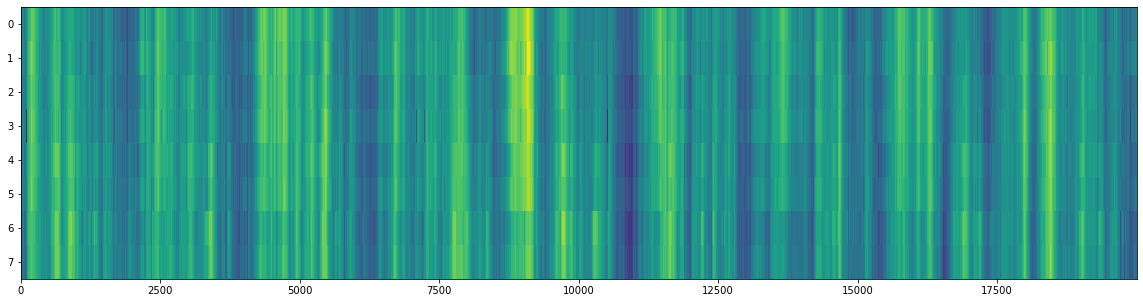

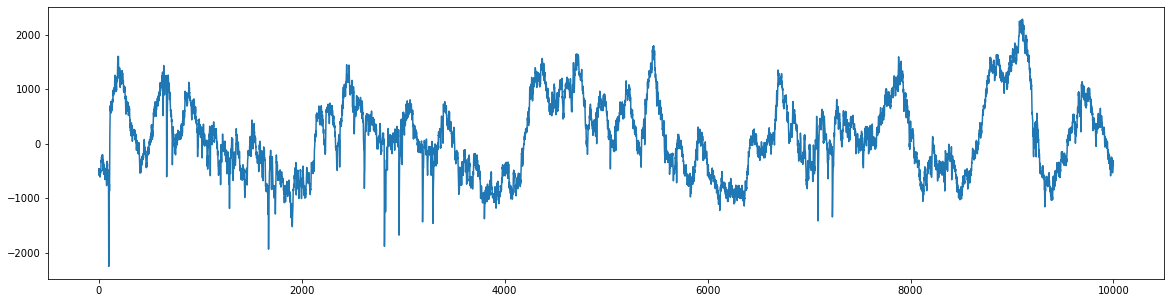

In [5]:
plt.figure(figsize=(20,5))
plt.imshow(dat,aspect="auto",interpolation="None")
plt.show()
plt.figure(figsize=(20,5))
plt.plot(dat[3,0:10000])

In [6]:
fn="/home/kevin/Downloads/shortRaw.npy"
np.save(fn,dat)

## Make a figure for lecture 1

In [7]:
fn = "/home/kevin/Downloads/shortRaw.npy"
dat = np.load(fn)

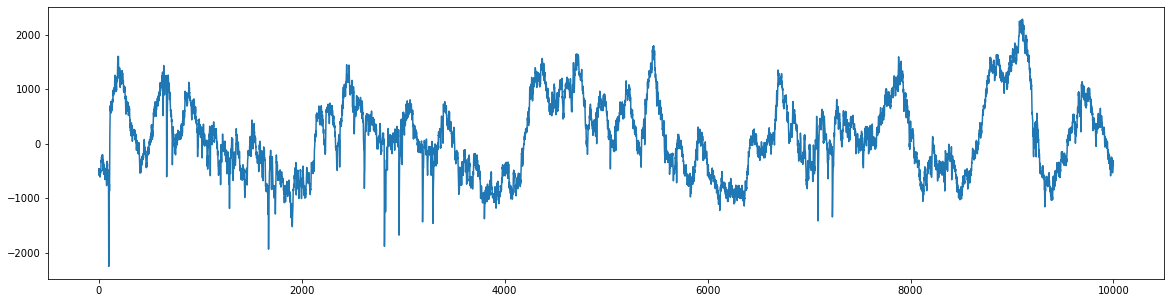

In [8]:
plt.figure(figsize=(20,5))
plt.plot(dat[3,0:10000])
plt.savefig("/home/kevin/repo/dataNeuroMaster/images/shortRaw.png")

Get a longer strech of data for spike clustering

In [10]:
dat = dfr.get_data_one_block(20000,int(20000+ses.sampling_rate*30),channels=channels)
dat.shape

(8, 600000)

In [11]:
fn = "/home/kevin/Downloads/longRaw.npy"
np.save(fn,dat)
dat = np.load(fn)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kevin/Downloads/longRaw.npy'